<h1>Omdena Nitrolytics AI Challenge</h1>

<a href = 'https://omdena.com/projects/determining-the-water-retention-capacity-of-naturally-fertilized-soil/'>Determining the Water Retention Capacity of Naturally Fertilized Soil Through Machine Learning</a>

<p><strong>Contributor</strong> : Jishnu S G</p>
<ul>
    <li><a href = 'https://linkedin.com/in/jishnukoliyadan/'>LinkedIn</a></li>
    <li><a href = 'https://github.com/jishnukoliyadan'>GitHub</a></li>
</ul> 

**Environments file**

```yml
name: nitrolytics
channels:
  - defaults
dependencies:
  - pip=23.0.1
  - python=3.11.3
  - pip:
      - jupyterlab==4.0.0
      - matplotlib==3.7.1
      - missingno==0.5.2
      - numpy==1.24.3
      - pandas==2.0.1
      - pyarrow==12.0.0
      - tqdm==4.65.0
```

## Importing libraries

In [1]:
import numpy as np
import pandas as pd

from tqdm import tqdm
import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [2]:
WRC_datas = pd.read_csv('WRC_dataset_carbon.csv', low_memory = False, na_values = np.nan)
print(f'Shape of the dataset : {WRC_datas.shape}\n')
WRC_datas.head(3)

Shape of the dataset : (29031, 54)



,layer_id,disturbed_undisturbed,climate_classes,profile_id,reference,DOIs_URLs,method,method_keywords,latitude_decimal_degrees,longitude_decimal_degrees,...,q97.5_n,q10_alpha,q90_alpha,q10_n,q90_n,q25_alpha,q75_alpha,q25_n,q75_n,data_flag
0,598297,disturbed,Temperate,53112,Bates_et_al_2020,https://doi.org/10.5194/essd-12-299-2020,Pressure plate,NaN,-1.250222,36.737778,...,NaN,0.052088,NaN,1.075699,NaN,0.088435,NaN,1.08417,2.662745,upper limit for alpha
1,598297,disturbed,Temperate,53112,Bates_et_al_2020,https://doi.org/10.5194/essd-12-299-2020,Pressure plate,NaN,-1.250222,36.737778,...,NaN,0.052088,NaN,1.075699,NaN,0.088435,NaN,1.08417,2.662745,upper limit for alpha
2,598297,disturbed,Temperate,53112,Bates_et_al_2020,https://doi.org/10.5194/essd-12-299-2020,Pressure plate,NaN,-1.250222,36.737778,...,NaN,0.052088,NaN,1.075699,NaN,0.088435,NaN,1.08417,2.662745,upper limit for alpha


## EDA - Missing Values

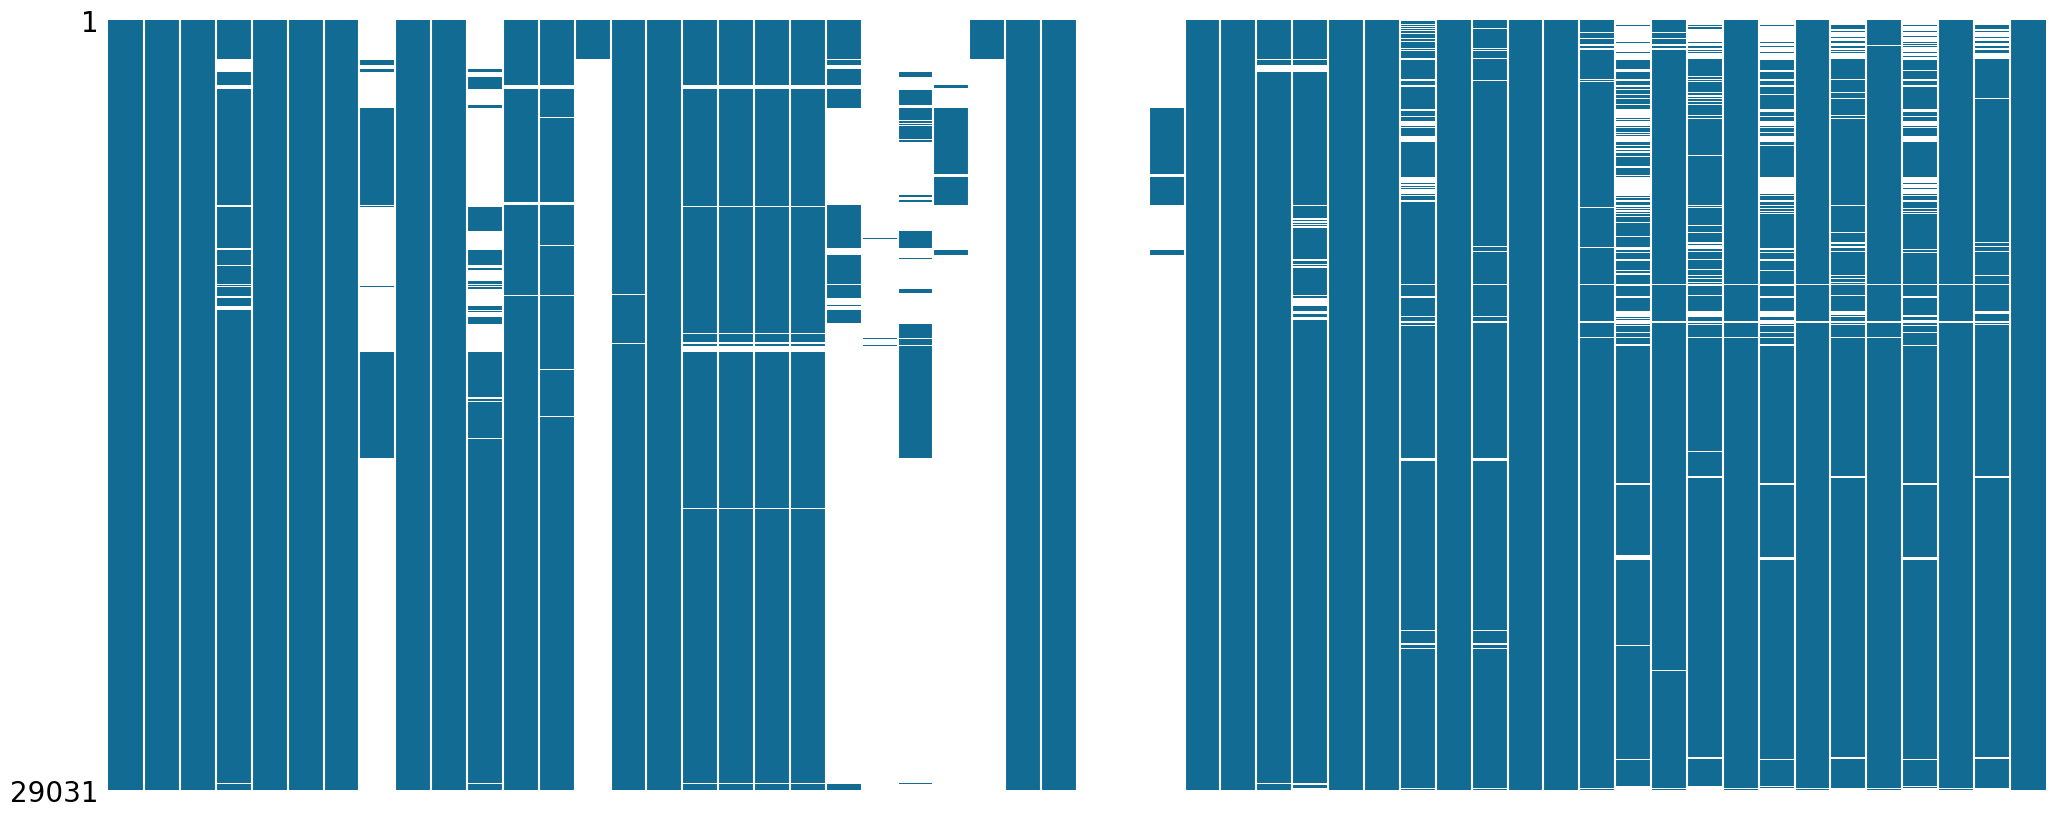

In [3]:
msn.matrix(WRC_datas, sparkline = False, color = (0.07, 0.42, 0.58))
plt.show()

In [4]:
def data_percentage_line(percentage, location):
    
    plt.axhline(int(WRC_datas.shape[0]*percentage)/100, color = '#F3ACA3', linewidth = 1)
    plt.text(location , int(WRC_datas.shape[0]*percentage)/100, f'{percentage}% of data is missing', fontsize = 9, va = 'center', ha = 'center', backgroundcolor = 'w')

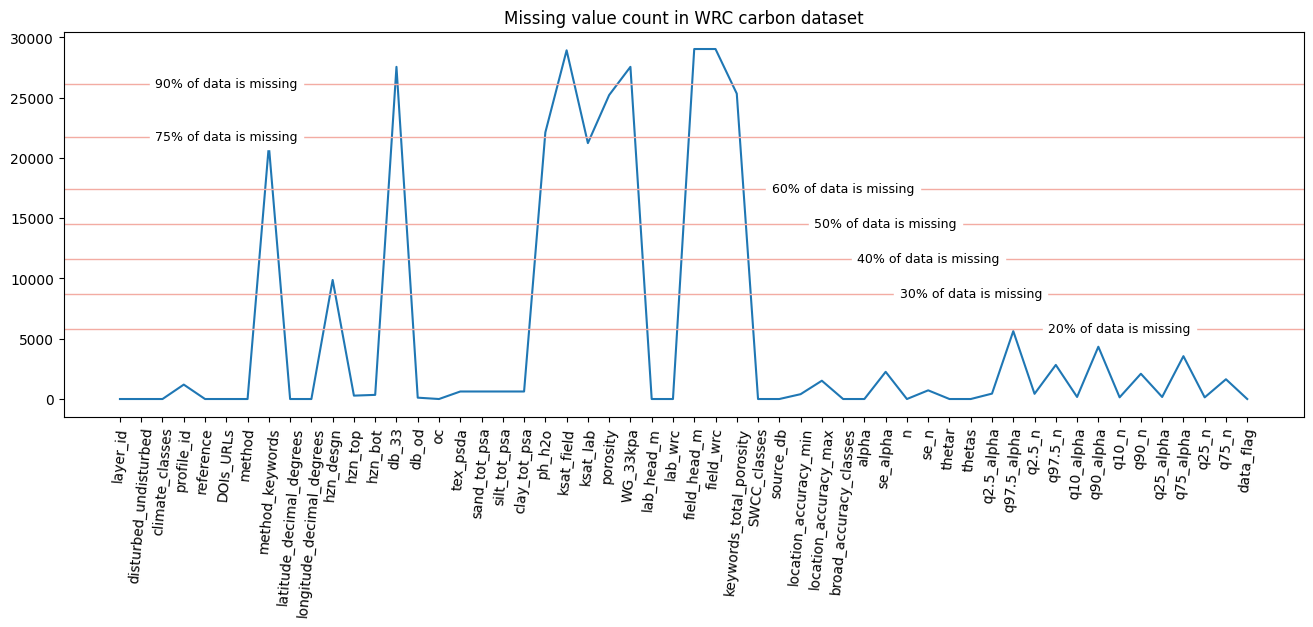

In [5]:
plt.figure(figsize = (16, 5))
sns.lineplot(y = WRC_datas.isnull().sum().values, x = WRC_datas.isnull().sum().index)
plt.xticks(rotation = 85)
for per_, loc_ in [(90, 5), (75, 5), (60, 34), (50, 36), (40, 38), (30, 40), (20, 47)]:
    data_percentage_line(per_, loc_)
plt.title('Missing value count in WRC carbon dataset')
plt.show()

<div class="alert alert-info" role="alert">
   <ul>
      <li>It's clear for some features morethan 60% of the data is missing.</li>
      <li>Setting a threshold of <strong>10,000</strong>, and if the missing count is greater than this threshold, remove those features</li>
    </ul> 
</div>

In [6]:
threshold = 10000
most_missing = pd.DataFrame(WRC_datas.isnull().sum()).reset_index().\
                            rename(columns = {'index' : 'Features', 0 : 'Null_Values'}).\
                            query('Null_Values >= @threshold').reset_index(drop = True)
print('The features that we are going to drop are,\n')
most_missing

The features that we are going to drop are,



,Features,Null_Values
0,method_keywords,21031
1,db_33,27553
2,ph_h2o,22116
3,ksat_field,28924
4,ksat_lab,21227
5,porosity,25213
6,WG_33kpa,27553
7,field_head_m,29031
8,field_wrc,29031
9,keywords_total_porosity,25332


## Dropping missing values

In [7]:
missing_col_drop = most_missing.Features.values
print(f'We are removing perviously selected {len(missing_col_drop)} features due to non availability of enough data')
WRC_datas.drop(missing_col_drop, axis = 1, inplace = True)

We are removing perviously selected 10 features due to non availability of enough data


In [8]:
drop_percentile_cols = ['se_alpha', 'q2.5_alpha', 'q97.5_alpha', 'q10_alpha', 'q90_alpha', 'q25_alpha', 'q75_alpha',
                        'se_n', 'q2.5_n', 'q97.5_n', 'q10_n', 'q90_n', 'q25_n', 'q75_n']

drop_redundant_cols = ['layer_id', 'profile_id', 'disturbed_undisturbed', 'reference', 'method', 'DOIs_URLs',
                       'latitude_decimal_degrees', 'longitude_decimal_degrees', 'source_db', 'location_accuracy_min',
                       'location_accuracy_max', 'broad_accuracy_classes', 'SWCC_classes', 'data_flag']

WRC_datas.drop(drop_percentile_cols + drop_redundant_cols, axis = 1, inplace = True)

In [9]:
print(WRC_datas.shape)
WRC_datas.head()

(29031, 16)


,climate_classes,hzn_desgn,hzn_top,hzn_bot,db_od,oc,tex_psda,sand_tot_psa,silt_tot_psa,clay_tot_psa,lab_head_m,lab_wrc,alpha,n,thetar,thetas
0,Temperate,NaN,0.0,18.0,0.771980,2.69,clay,8.7,22.5,68.8,20.0,0.247034,100.0,1.181068,0.123787,0.620758
1,Temperate,NaN,0.0,18.0,0.771980,2.69,clay,8.7,22.5,68.8,1.0,0.331951,100.0,1.181068,0.123787,0.620758
2,Temperate,NaN,0.0,18.0,0.771980,2.69,clay,8.7,22.5,68.8,150.0,0.209979,100.0,1.181068,0.123787,0.620758
3,Temperate,NaN,0.0,18.0,0.771980,2.69,clay,8.7,22.5,68.8,3.3,0.308020,100.0,1.181068,0.123787,0.620758
4,Temperate,NaN,18.0,44.0,0.713786,2.77,clay,8.4,24.1,67.5,150.0,0.192722,100.0,1.200883,0.119823,0.639848


## Dropping duplicate values

In [10]:
print(f'Number of duplicate recoreds present in the dataset :: {WRC_datas[WRC_datas.duplicated()].shape[0]}\n')

WRC_datas.drop_duplicates(keep = 'first', ignore_index = True, inplace = True)
print(f'Shape of dataframe post dropping duplicates :: {WRC_datas.shape}')

Number of duplicate recoreds present in the dataset :: 25

Shape of dataframe post dropping duplicates :: (29006, 16)


In [11]:
WRC_datas.isnull().sum()

climate_classes       0
hzn_desgn          9877
hzn_top             281
hzn_bot             344
db_od               112
oc                    0
tex_psda            623
sand_tot_psa        623
silt_tot_psa        623
clay_tot_psa        623
lab_head_m            0
lab_wrc               0
alpha                 0
n                     0
thetar                0
thetas                0
dtype: int64

In [12]:
# Creating new feature value for missing  values of `hzn_desgn` column

WRC_datas.hzn_desgn.fillna('Unknown', inplace = True)

## Numerical missing value columns and distribution

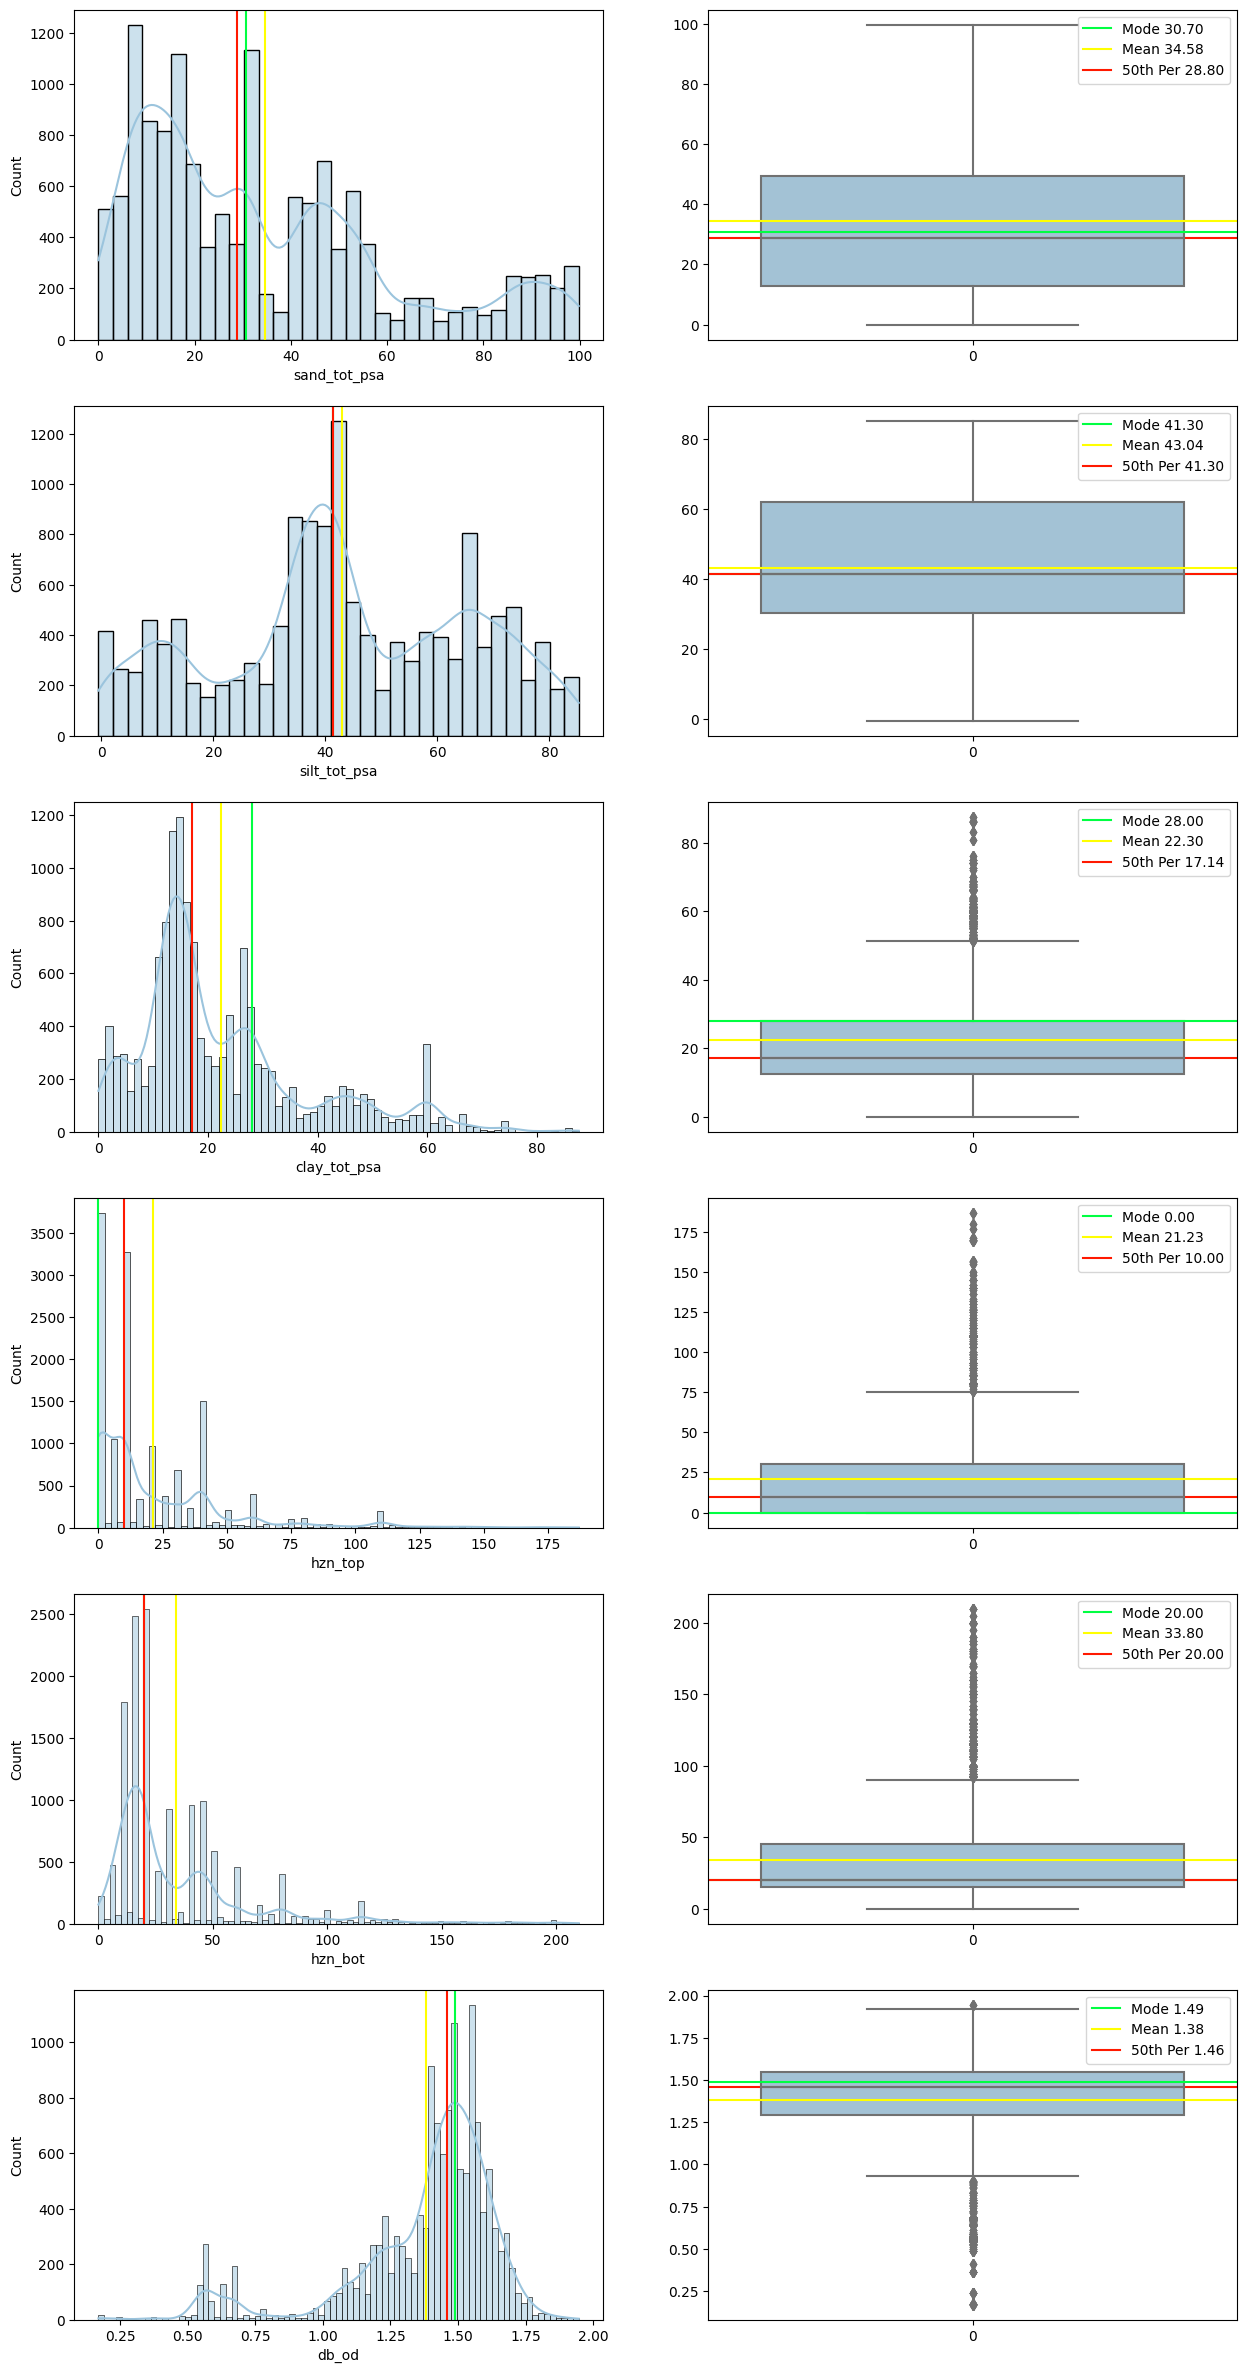

In [13]:
n = 1
tickers = ['sand_tot_psa', 'silt_tot_psa', 'clay_tot_psa', 'hzn_top', 'hzn_bot', 'db_od']
plt.figure(figsize = (15, 30))
for ticker in tickers:
    
    mode_line = WRC_datas.query('climate_classes == "Temperate"')[ticker].mode().values[0]
    mean_line = WRC_datas.query('climate_classes == "Temperate"')[ticker].mean()
    fifty_per = np.nanpercentile(WRC_datas.query('climate_classes == "Temperate"')[ticker], 50)

    ax = plt.subplot(6, 2, n)

    sns.histplot(WRC_datas.query('climate_classes == "Temperate"')[ticker], kde = True, ax =ax, color = '#9BC4DD')
    plt.axvline(mode_line, color = '#00FF42', label = f'Mode {mode_line:.2f}')
    plt.axvline(mean_line, color = '#FFFF00', label = f'Mean {mean_line:.2f}')
    plt.axvline(fifty_per, color = '#FF1900', label = f'50th Per {fifty_per:.2f}')
    n += 1

    ax = plt.subplot(6, 2, n)
    sns.boxplot(WRC_datas.query('climate_classes == "Temperate"')[ticker], ax = ax, color = '#9BC4DD')
    plt.axhline(mode_line, color = '#00FF42', label = f'Mode {mode_line:.2f}')
    plt.axhline(mean_line, color = '#FFFF00', label = f'Mean {mean_line:.2f}')
    plt.axhline(fifty_per, color = '#FF1900', label = f'50th Per {fifty_per:.2f}')
    plt.legend()
    n += 1
    
plt.show()

## Missing value imputaion

<p><strong>USDA soil taxonomy</strong></p>
<ul>
    <li>A taxonomy is an arrangement in a systematic manner.</li>
    <li>There are 12 soil orders (the top hierarchical level) in soil taxonomy.</li>
    <li>The names of the orders end with the suffix -sol.</li>
    <li>The criteria for the different soil orders include properties that reflect major differences in the genesis of soils.</li>
</ul> 

<img src = 'https://user-images.githubusercontent.com/83589431/242386151-30524d95-a85a-4513-ba44-7b79589d9303.png' width = 80%>

<p><strong>Reference</strong> : <a href = 'https://en.wikipedia.org/wiki/USDA_soil_taxonomy'>USDA soil taxonomy</a></p>

<div class = 'alert alert-info' role = 'alert'>
    <ul>
        <li>Filling missing values based on the <strong>climate_classes</strong> columns different climates</li>
        <li>For Soil taxonomy column uses most frequest value to fill missing values</li>
        <li>Numerical columns takes <strong>50th percentile value</strong> to fill missing values</li>
    </ul> 
</div>

In [14]:
for col_name in ['clay_tot_psa', 'db_od', 'hzn_bot', 'hzn_top', 'sand_tot_psa', 'silt_tot_psa', 'tex_psda']:
    if col_name == 'tex_psda':
        temperate_ = WRC_datas.query('climate_classes == "Temperate"')[col_name].value_counts().index[0]
        tropical_ = WRC_datas.query('climate_classes == "Tropical"')[col_name].value_counts().index[0]
        arid_ = WRC_datas.query('climate_classes == "Arid"')[col_name].value_counts().index[0]
        boreal_ = WRC_datas.query('climate_classes == "Boreal"')[col_name].value_counts().index[0]
    else:
        temperate_ = np.nanpercentile(WRC_datas.query('climate_classes == "Temperate"')[ticker], 50)
        tropical_ = np.nanpercentile(WRC_datas.query('climate_classes == "Tropical"')[ticker], 50)
        arid_ = np.nanpercentile(WRC_datas.query('climate_classes == "Arid"')[ticker], 50)
        boreal_ = np.nanpercentile(WRC_datas.query('climate_classes == "Boreal"')[ticker], 50)
        
    WRC_datas.loc[(WRC_datas.climate_classes == 'Temperate') & (WRC_datas[col_name].isna()), 'temperate_'] = temperate_
    WRC_datas.loc[(WRC_datas.climate_classes == 'Tropical') & (WRC_datas[col_name].isna()), 'tropical_'] = tropical_
    WRC_datas.loc[(WRC_datas.climate_classes == 'Arid') & (WRC_datas[col_name].isna()), 'arid_'] = arid_
    WRC_datas.loc[(WRC_datas.climate_classes == 'Boreal') & (WRC_datas[col_name].isna()), 'boreal_'] = boreal_

    WRC_datas[col_name] = WRC_datas[col_name].combine_first(WRC_datas.temperate_)
    WRC_datas[col_name] = WRC_datas[col_name].combine_first(WRC_datas.tropical_)
    WRC_datas[col_name] = WRC_datas[col_name].combine_first(WRC_datas.arid_)
    WRC_datas[col_name] = WRC_datas[col_name].combine_first(WRC_datas.boreal_)

# Dropping unwanted columns
WRC_datas.drop(['temperate_', 'tropical_', 'arid_', 'boreal_'], axis = 1, inplace = True)

In [15]:
# Missing value count post missing value imputaion

WRC_datas.isnull().sum()

climate_classes    0
hzn_desgn          0
hzn_top            0
hzn_bot            0
db_od              0
oc                 0
tex_psda           0
sand_tot_psa       0
silt_tot_psa       0
clay_tot_psa       0
lab_head_m         0
lab_wrc            0
alpha              0
n                  0
thetar             0
thetas             0
dtype: int64

In [16]:
# Converting datatypes inorder to make memory efficient

WRC_datas.climate_classes = WRC_datas.climate_classes.astype('category')
WRC_datas.hzn_desgn = WRC_datas.hzn_desgn.astype('category')
WRC_datas.tex_psda = WRC_datas.tex_psda.astype('category')

WRC_datas.head(3)

,climate_classes,hzn_desgn,hzn_top,hzn_bot,db_od,oc,tex_psda,sand_tot_psa,silt_tot_psa,clay_tot_psa,lab_head_m,lab_wrc,alpha,n,thetar,thetas
0,Temperate,Unknown,0.0,18.0,0.77198,2.69,clay,8.7,22.5,68.8,20.0,0.247034,100.0,1.181068,0.123787,0.620758
1,Temperate,Unknown,0.0,18.0,0.77198,2.69,clay,8.7,22.5,68.8,1.0,0.331951,100.0,1.181068,0.123787,0.620758
2,Temperate,Unknown,0.0,18.0,0.77198,2.69,clay,8.7,22.5,68.8,150.0,0.209979,100.0,1.181068,0.123787,0.620758


In [17]:
# Verifying the columns and datatypes

WRC_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   climate_classes  29006 non-null  category
 1   hzn_desgn        29006 non-null  category
 2   hzn_top          29006 non-null  float64 
 3   hzn_bot          29006 non-null  float64 
 4   db_od            29006 non-null  float64 
 5   oc               29006 non-null  float64 
 6   tex_psda         29006 non-null  category
 7   sand_tot_psa     29006 non-null  float64 
 8   silt_tot_psa     29006 non-null  float64 
 9   clay_tot_psa     29006 non-null  float64 
 10  lab_head_m       29006 non-null  float64 
 11  lab_wrc          29006 non-null  float64 
 12  alpha            29006 non-null  float64 
 13  n                29006 non-null  float64 
 14  thetar           29006 non-null  float64 
 15  thetas           29006 non-null  float64 
dtypes: category(3), float64(13)
memory usage

## Saving processed file in `parquet` format

In [18]:
# Saving the dataframe to `parquet` file

WRC_datas.to_parquet('WRC_dataset_carbon_imputed.parquet')